# Logistic Regression Resampled

All features

No standardisation

Default parameteres in logistic regression

Up-sample the minority class

Pre-requisite: nommesen_april-week2-prepare_data.ipynb

In [1]:
import pandas as pd
import numpy as np
import math

# SKLearn
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import joblib


## Loading the training data set

In [2]:
alltrain = np.load('../data/processed/alltrain.npy')

print("Dimension of training data - unsplit", alltrain.shape)

df_alltrain = pd.DataFrame(alltrain, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers',
     'TARGET_5Yrs'
                     ])

df_alltrain['TARGET_5Yrs'] = df_alltrain['TARGET_5Yrs'].astype(dtype ='int64')
df_alltrain['ID'] = df_alltrain['ID'].astype(dtype ='str')

df_alltrain.head()

Dimension of training data - unsplit (8000, 21)


,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,3799.0,80.0,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,3800.0,75.0,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,3801.0,85.0,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3802.0,63.0,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,3803.0,63.0,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


### Visualise the target variable (imbalanced)

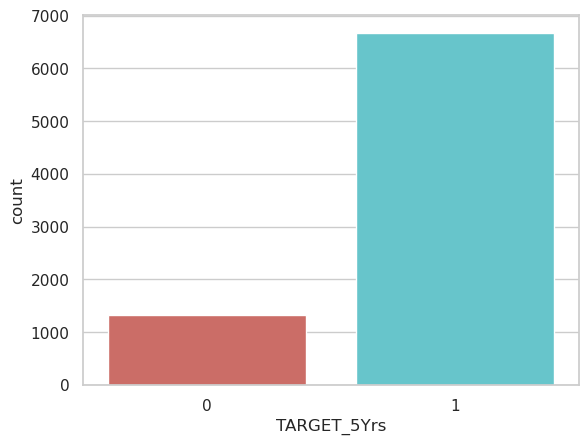

<Figure size 640x480 with 0 Axes>

In [3]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = 'TARGET_5Yrs',
              data = df_alltrain,
              palette = 'hls'
             )
plt.show()
plt.savefig('count_plot')

In [4]:
df_alltrain['TARGET_5Yrs'].value_counts()

1    6669
0    1331
Name: TARGET_5Yrs, dtype: int64

In [5]:
count_lt_5Yrs = len(df_alltrain[df_alltrain['TARGET_5Yrs']==0])
count_gt_5Yrs = len(df_alltrain[df_alltrain['TARGET_5Yrs']==1])
pct_of_lt_5Yrs = count_lt_5Yrs/(count_lt_5Yrs+count_gt_5Yrs)
print("Percentage of NBA career less than 5 years is", pct_of_lt_5Yrs*100)
pct_of_gt_5Yrs = count_gt_5Yrs/(count_lt_5Yrs+count_gt_5Yrs)
print("Percentage of NBA career at least 5 years is", pct_of_gt_5Yrs*100)

Percentage of NBA career less than 5 years is 16.6375
Percentage of NBA career at least 5 years is 83.3625


## Splitting data
Split randomly the dataset with random_state=8 into 2 different sets: training data (80%) and validation data (20%)

In [6]:
df_training, df_validation, = train_test_split (df_alltrain, 
                                                   test_size=0.2,
                                                   random_state=8
                                                  )

print("Dimension of training data", df_training.shape)
df_training.info()
print('------------------------------------------------------------------------------------')
print("Dimension of validation data", df_validation.shape)
df_validation.info()

Dimension of training data (6400, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6400 entries, 3617 to 4547
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    6400 non-null   object 
 1   Games Played          6400 non-null   float64
 2   Minutes Played        6400 non-null   float64
 3   Points Per Game       6400 non-null   float64
 4   Field Goals Made      6400 non-null   float64
 5   Field Goals Attempts  6400 non-null   float64
 6   Field Goals Percent   6400 non-null   float64
 7   3Points Made          6400 non-null   float64
 8   3Points Attempts      6400 non-null   float64
 9   3Points Percent       6400 non-null   float64
 10  Free Throw Made       6400 non-null   float64
 11  Free Throw Attempts   6400 non-null   float64
 12  Free Throw Percent    6400 non-null   float64
 13  Offensive Rebounds    6400 non-null   float64
 14  Defensive Rebounds    6400 non-

## Oversample

In [7]:
df_training['TARGET_5Yrs'].value_counts()

1    5326
0    1074
Name: TARGET_5Yrs, dtype: int64

In [8]:


# Separate majority and minority classes
df_majority = df_training[df_training['TARGET_5Yrs']==1]
df_minority = df_training[df_training['TARGET_5Yrs']==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5326,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.TARGET_5Yrs.value_counts()

1    5326
0    5326
Name: TARGET_5Yrs, dtype: int64

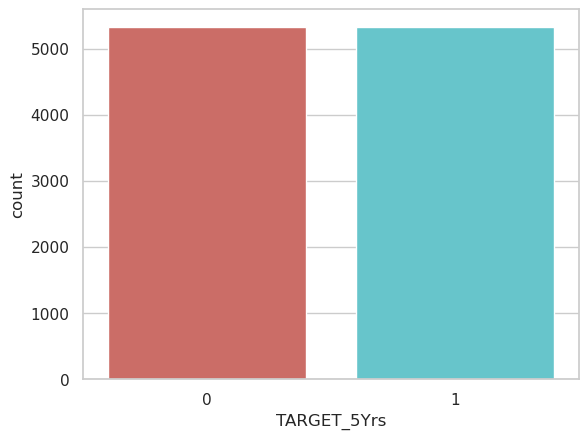

<Figure size 640x480 with 0 Axes>

In [9]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = 'TARGET_5Yrs',
              data = df_upsampled,
              palette = 'hls'
             )
plt.show()
plt.savefig('count_plot')

## Feature selection
All features are used

In [10]:
y_train = df_upsampled.pop('TARGET_5Yrs')
X_train = df_upsampled[['Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers']]

y_val = df_validation.pop('TARGET_5Yrs')
X_val = df_validation[['Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers']]

print("Dimension of features training data", X_train.shape)
print("Dimension of target training data", y_train.shape)
print("Dimension of features validation data", X_val.shape)
print("Dimension of targer validation data", y_val.shape)


Dimension of features training data (10652, 19)
Dimension of target training data (10652,)
Dimension of features validation data (1600, 19)
Dimension of targer validation data (1600,)


## Model Development and Prediction

Using default parameters

In [11]:
# instantiate the model (using the default parameters)
logreg2_train = LogisticRegression(random_state=16)

# fit the model with data
logreg2_train.fit(X_train, y_train)


/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [12]:
# save the model to disk
my_model_filename = '../models/logreg2.sav'
joblib.dump(logreg2_train, my_model_filename)

['../models/logreg2.sav']

## Model Evaluation

In [13]:
# Predict on training set
y_pred_ontrain = logreg2_train.predict(X_train)

# Accuracy
print( accuracy_score(y_pred_ontrain, y_train) )

0.6477656778069846


### Prediction on valuation set

In [14]:
y_pred_onval = logreg2_train.predict(X_val)
y_pred_onval

array([0, 0, 1, ..., 1, 0, 1])

### Confusion Matrix

In [15]:
cnf_matrix = metrics.confusion_matrix(y_val, y_pred_onval)
cnf_matrix


array([[175,  82],
       [533, 810]])

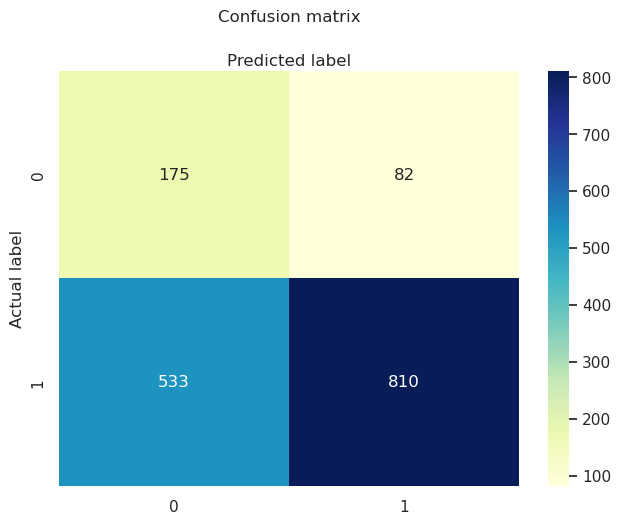

In [16]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Accuracy, Precision, and Recall

In [17]:
target_names = ['career years played < 5', 'career years played >= 5']
print(classification_report(y_val, y_pred_onval, target_names=target_names))

                          precision    recall  f1-score   support

 career years played < 5       0.25      0.68      0.36       257
career years played >= 5       0.91      0.60      0.72      1343

                accuracy                           0.62      1600
               macro avg       0.58      0.64      0.54      1600
            weighted avg       0.80      0.62      0.67      1600



### ROC

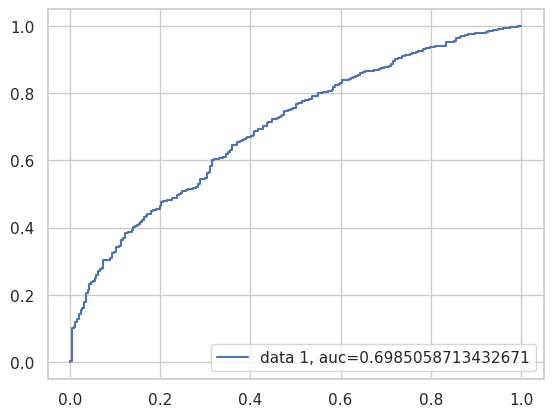

In [18]:
y_proba_onval = logreg2_train.predict_proba(X_val)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_val,  y_proba_onval)
auc = metrics.roc_auc_score(y_val, y_proba_onval)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Test on unseen data

### Loading the test data set

In [19]:
test = np.load('../data/processed/test.npy')

print("Dimension of training data - unsplit", test.shape)

df_test = pd.DataFrame(test, 
             columns=['ID',
                 'Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers'
                     ])

df_test['ID'] = df_test['ID'].astype(int)
df_test['ID'] = df_test['ID'].astype(str)

# df_test_indexed=df_test.set_index('ID')

df_test.head()

Dimension of training data - unsplit (3799, 20)


,ID,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    3799 non-null   object 
 1   Games Played          3799 non-null   float64
 2   Minutes Played        3799 non-null   float64
 3   Points Per Game       3799 non-null   float64
 4   Field Goals Made      3799 non-null   float64
 5   Field Goals Attempts  3799 non-null   float64
 6   Field Goals Percent   3799 non-null   float64
 7   3Points Made          3799 non-null   float64
 8   3Points Attempts      3799 non-null   float64
 9   3Points Percent       3799 non-null   float64
 10  Free Throw Made       3799 non-null   float64
 11  Free Throw Attempts   3799 non-null   float64
 12  Free Throw Percent    3799 non-null   float64
 13  Offensive Rebounds    3799 non-null   float64
 14  Defensive Rebounds    3799 non-null   float64
 15  Rebounds             

In [21]:
df_features_test = df_test[['Games Played', 
    'Minutes Played',
    'Points Per Game',
    'Field Goals Made',
    'Field Goals Attempts',
    'Field Goals Percent',
    '3Points Made',
    '3Points Attempts',
    '3Points Percent',
    'Free Throw Made',
    'Free Throw Attempts',
    'Free Throw Percent',
    'Offensive Rebounds',
    'Defensive Rebounds',
    'Rebounds',
    'Assists',
    'Steals',
    'Blocks',
    'Turnovers']]

df_features_test.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


### Predictions

In [22]:
# Load the model from the file 
logreg2_from_joblib = joblib.load('../models/logreg2.sav') 

# Use the loaded model to make predictions 
y_pred_ontest = logreg2_from_joblib.predict(df_features_test)

df_test_predictions = pd.DataFrame(y_pred_ontest, columns=['TARGET_5Yrs'])

df_test_predictions.TARGET_5Yrs.value_counts()

1    2156
0    1643
Name: TARGET_5Yrs, dtype: int64

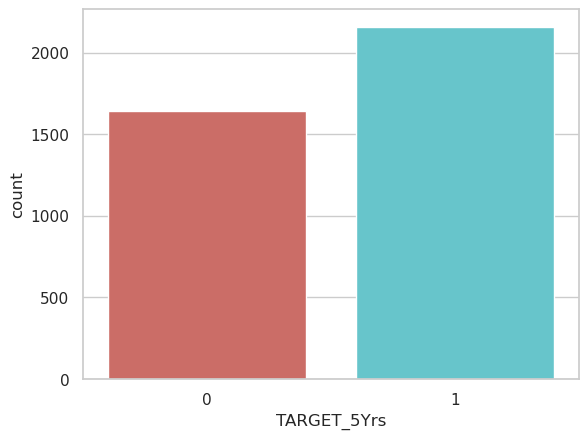

<Figure size 640x480 with 0 Axes>

In [23]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x = 'TARGET_5Yrs',
              data = df_test_predictions,
              palette = 'hls'
             )
plt.show()
plt.savefig('count_plot')


### Submit Prediction to Kaggle

In [24]:
# Use the loaded model to make predictions 
y_test = logreg2_from_joblib.predict_proba(df_features_test)

In [25]:
y_test

array([[0.51627972, 0.48372028],
       [0.53381284, 0.46618716],
       [0.33195078, 0.66804922],
       ...,
       [0.58093908, 0.41906092],
       [0.16551059, 0.83448941],
       [0.62355891, 0.37644109]])

In [26]:
df_test_probabilites = pd.DataFrame(y_test, 
             columns=['TARGET_5Yrs_0',
                 'TARGET_5Yrs'
                     ])

In [27]:
df_test_probabilites.head()

,TARGET_5Yrs_0,TARGET_5Yrs
0,0.516280,0.483720
1,0.533813,0.466187
2,0.331951,0.668049
3,0.195995,0.804005
4,0.573642,0.426358


In [28]:
output = df_test.join(df_test_probabilites)
output=output.set_index('ID')

output

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goals Attempts,Field Goals Percent,3Points Made,3Points Attempts,3Points Percent,Free Throw Made,...,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs_0,TARGET_5Yrs
ID,,,,,,,,,,,,,,,,,,,,,
0,56.0,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,...,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8,0.516280,0.483720
1,43.0,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,...,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8,0.533813,0.466187
2,82.0,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,...,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0,0.331951,0.668049
3,86.0,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,...,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6,0.195995,0.804005
4,58.0,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,...,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9,0.573642,0.426358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84.0,21.2,8.7,3.4,6.7,50.2,0.0,0.0,-4.5,1.7,...,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0,0.215466,0.784534
3795,49.0,16.3,6.4,2.9,6.6,44.4,-0.1,-0.4,19.8,1.0,...,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7,0.530297,0.469703
3796,53.0,9.9,2.1,0.8,1.8,43.1,-0.4,-0.6,1.9,0.6,...,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5,0.580939,0.419061


In [29]:
# output['TARGET_5Yrs'].to_csv('../models/nommesen_april_week2_model-logreg2.csv')